# FIT5196 Assessment 2: Data Cleansing

#### Student Name: Neha Jain
#### Student ID: 29325013

Date: 01/10/2018


Below Python notebook is written for cleaning the dataset provided in 29325013.csv and store the clean data as output.<br>
For this purpose pandas dataframe is used along with multiple math functions, datetime functions, sklearn for Linear Regression, numpy and further more.

## 1. Importing the libraries

In [1]:
import pandas as pd
import math
from datetime import datetime
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import calendar
from datetime import datetime
from datetime import timedelta
import math
import webbrowser
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

## 2. Reading the file

The file is read in two dataframes, df is permanent and the fixing and data analysis will be done in df1.

In [2]:
df = pd.read_csv("29325013.csv")
df1 = pd.read_csv("29325013.csv")

### Reading the dimensionality of the data and a few lines of the data.

In [3]:
print(df1.shape)
df1.head()

(38348, 16)


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1965570161,3.0,0.0,43.806,27.0,30.0,-36.999493,144.125631,-36.615672,146.690051,232.508,2018-04-20,21:51:55,188.32,1:00:14,211.42
1,ID5489608449,2.0,1.0,12.712,19.0,21.0,-36.800920,146.082135,-37.894829,147.268490,160.776,2018-01-24,09:00:24,139.20,11:19:35,166.90
2,ID1490535891,2.0,0.0,38.357,10.0,24.0,-37.785502,147.919594,-37.314069,146.475541,137.824,2018-06-06,12:12:04,120.34,14:12:24,146.96
3,ID1587402563,3.0,0.0,14.485,36.0,4.0,-36.750270,142.801046,-38.028444,146.593386,364.304,2018-05-01,06:56:12,291.02,11:47:13,190.35
4,ID1994128611,2.0,0.0,44.758,4.0,22.0,-37.792548,146.498460,-36.813899,148.062099,176.170,2018-07-01,04:57:17,151.85,7:29:07,172.30


There are 38348 rows and 16 columns in the dataset.
Above are the values of top 5 rows in the dataset

## 3. Data Auditing

### 3.1 Auditing the Data

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38348 entries, 0 to 38347
Data columns (total 16 columns):
Id                       38327 non-null object
Drone Type               38338 non-null float64
Post Type                38328 non-null float64
Package Weight           38348 non-null float64
Origin Region            38338 non-null float64
Destination Region       38338 non-null float64
Origin Latitude          38348 non-null float64
Origin Longitude         38348 non-null float64
Destination Latitude     38348 non-null float64
Destination Longitude    38348 non-null float64
Journey Distance         38348 non-null float64
Departure Date           38348 non-null object
Departure Time           38348 non-null object
Travel Time              38308 non-null float64
Delivery Time            38348 non-null object
Delivery Fare            38318 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.7+ MB


There are 4 Object type of columns and 12 float64 type

### 3.2 Distribution of the numerical values across the data

In [5]:
df1.describe()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
count,38338.000000,38328.000000,38348.000000,38338.000000,38338.000000,38348.000000,38348.000000,38348.000000,38348.000000,38348.000000,38308.000000,38318.000000
mean,1.698576,0.299546,26.333221,22.328708,22.409907,-37.785670,145.377150,-37.788978,145.386813,210.602428,182.100459,159.233948
std,0.779908,0.458065,12.435192,12.664915,12.725390,1.888956,6.845053,1.884374,6.846173,108.419333,90.434770,65.400532
min,1.000000,0.000000,5.000000,1.000000,1.000000,-39.006967,-148.432857,-39.006967,-148.191363,0.203000,7.170000,71.760000
25%,1.000000,0.000000,15.556250,11.000000,11.000000,-38.487042,144.128018,-38.487772,144.132655,127.165750,112.317500,125.020000
50%,1.000000,0.000000,26.253000,22.000000,22.000000,-37.847940,145.440157,-37.853805,145.462760,200.823000,173.240000,151.800000
75%,2.000000,1.000000,36.890250,33.000000,33.000000,-37.174460,146.955777,-37.177593,146.968260,281.828250,241.542500,182.827500
max,3.000000,1.000000,56.973000,44.000000,44.000000,38.972697,148.449748,38.897788,148.449748,536.635000,466.310000,1312.880000


The observation tells us that

* Total rows are 38348 in the dataset provided for delivering packages.
* Drone Type is a categorical feature with 1, 2 or 3 values.
* 10 values are missing in Drone Type.
* Post Type is a categorical feature with 0 or 1 values.
* 20 values are missing in Post Type.
* Minimum package sent by the customer is of 5 units and maximum is as high as 56.97 units.
* There are 10 values missing for both Origin and Destination Region.
* Both Origin and Destination Region are categorical with values ranging from 1 to 44.
* There are no missing values in Origin and Destination Longitude and Latitudes.
* Origin and Destination Latitude values are fine with values ranging between -90 degress to +90 degrees.
* Origin and Destination Longitude values are fine with values ranging between -180 degress to +180 degrees.
* The journer distance of the Drone varies from as less as 0.2 to as high as 536.635.
* There are 40 missing values in Travel time and it ranges from 7.17 to 466.31 units.
* There are 30 missing values in Delivery Fare. 
* Delivery Fare varies alot with minimum value of 71.76 to maximum of 1312.88

### 3.3 Distribution of the categorical variables

Now analysing the distribution for categorical variables

Before analysing the categorical variables, we first make three intervals for the variable Departure Time according to below criterion:
* morning (6:00:00 - 11:59:59) - 1
* afternoon (12:00:00 - 20:59:59) - 2
* night (21:00 - 5:59:59)- 3


In [6]:
for each in df1.index:
    try: 
        if datetime.strptime('6:00:00', '%H:%M:%S')<= datetime.strptime(df1.iloc[each]["Departure Time"], '%H:%M:%S')\
                        <= datetime.strptime('11:59:59', '%H:%M:%S'):
                df1.at[each, 'Interval'] = 1  
        elif datetime.strptime('12:00:00', '%H:%M:%S')<= datetime.strptime(df1.iloc[each]["Departure Time"], '%H:%M:%S')\
                        <= datetime.strptime('20:59:59', '%H:%M:%S'):
                df1.at[each, 'Interval'] = 2
        elif datetime.strptime('21:00:00', '%H:%M:%S')<= datetime.strptime(df1.iloc[each]["Departure Time"], '%H:%M:%S') or\
                datetime.strptime(df1.iloc[each]["Departure Time"], '%H:%M:%S') <= datetime.strptime('5:59:59', '%H:%M:%S'):
                df1.at[each,'Interval'] = 3
    except ValueError:
            df1.at[each,'Interval'] = 4

In [7]:
df1.describe(include=['O'])

,Id,Departure Date,Departure Time,Delivery Time
count,38327,38348,38348,38348
unique,38288,270,30899,30965
top,ID1947763961,2018-02-28,12:42:49,1:15:12
freq,2,236,6,5


We have the following observations from above data:

There are missing values in the Id column.
There are 38288 unique values of ID from 38327 which means that there are duplicates present.
The intervals of the Departure time have 3 unique values hence the range of Departure Time is correct.

## 4. EDA and fixing the errors in the data

### 4.1 Post Type Cleaning and Imputation

In [8]:
df1["Post Type"].unique()

array([ 0.,  1., nan])

There are currently 3 unique values of Post Type including nan.

In [9]:
count = 0
for each in df1.index:
    if pd.isnull(df1.iloc[each]["Id"]) == False and pd.isnull(df1.iloc[each]["Post Type"]) == False:
        if int(df1.iloc[each]["Id"][2]) == 1:
            post = 0
        elif int(df1.iloc[each]["Id"][2]) == 5:
            post = 1
        if int(df1.iloc[each]["Post Type"]) == post:
            count+=1
            
print(count)

38267


There are 38267 records for Post Type which are correct as per the first numeric character in ID, this is ~99% of data is fitting. 
Hence correcting the rest and imputing the missing values.

In [10]:
for each in df1.index:
    if pd.isnull(df1.iloc[each]["Id"]) == False:
        if int(df1.iloc[each]["Id"][2]) == 1:
            post = 0
        elif int(df1.iloc[each]["Id"][2]) == 5:
            post = 1
        df1.at[each, "Post Type"] = post

Now again checking the unique values in Post Type

In [11]:
df1["Post Type"].unique()

array([0., 1.])

In [12]:
df1[pd.isnull(df1["Post Type"])]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Interval


Now there are 2 unique values and no null values in Post Type.
This implies that Post Type(20 records) is now fixed.

### 4.2 Origin and Destination Longitude and Latitude
Next we verify the data for Origin and Destination Longitude and Latitude

Describing the Origin Longitude and Latitude data and analysing its Distribution

In [13]:
df1["Origin Latitude"].describe()

count    38348.000000
mean       -37.785670
std          1.888956
min        -39.006967
25%        -38.487042
50%        -37.847940
75%        -37.174460
max         38.972697
Name: Origin Latitude, dtype: float64

In the above description, 75% of the data is negative, and the mean is also negative. This means that very few data is positive and hence can be a data issue.
There are no missing values.<br>
Similar is the case for Destination Latitude as shown below.

In [14]:
df1["Destination Latitude"].describe()

count    38348.000000
mean       -37.788978
std          1.884374
min        -39.006967
25%        -38.487772
50%        -37.853805
75%        -37.177593
max         38.897788
Name: Destination Latitude, dtype: float64

In [15]:
df1["Origin Longitude"].describe()

count    38348.000000
mean       145.377150
std          6.845053
min       -148.432857
25%        144.128018
50%        145.440157
75%        146.955777
max        148.449748
Name: Origin Longitude, dtype: float64

In the above description, 75% of the data is positive, and the mean is also positive. This means that very few data is negative and hence can be a data issue.
There are no missing values.<br>
Similarily for Destination Longitude

In [16]:
df1["Destination Longitude"].describe()

count    38348.000000
mean       145.386813
std          6.846173
min       -148.191363
25%        144.132655
50%        145.462760
75%        146.968260
max        148.449748
Name: Destination Longitude, dtype: float64

We plot the data on the map and check the clusters

In [17]:
# import gmplot package 
import gmplot 

df5= df1

latitude_list = list(df5["Origin Latitude"])
longitude_list = list(df5["Origin Longitude"])
l1 = math.floor(len(latitude_list)/2) #assigning the central value 
l2 = math.floor(len(longitude_list)/2) #assigning the central value 
mi = latitude_list[l1]
ma = longitude_list[l2]

gmap3 = gmplot.GoogleMapPlotter(mi,ma, 2) #giving a Refernce point
  
# scatter method of map object  
# scatter points on the google map 
gmap3.scatter( latitude_list, longitude_list, '#000000',  #plotting rest of the value
                              size = 100, marker = False ) 
# Plot method Draw a line in 
# between given coordinates 
#gmap3.plot(latitude_list, longitude_list,  
 #          'cornflowerblue', edge_width = 2.5) 

gmap3.draw( "mymap_origin.html" ) 


f = "mymap_origin.html"
webbrowser.open_new_tab(f)

True

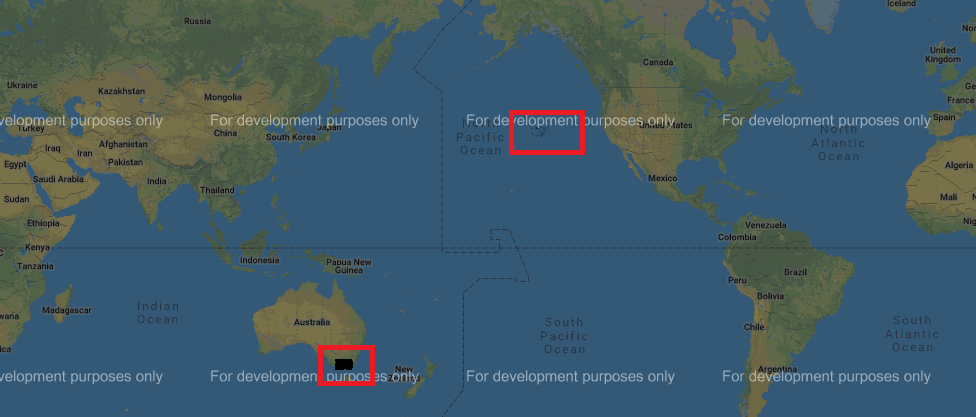

In above map, when the Origin Latitude and Longitude are plotted, we get a few values which are outside the Victoria region and in Blue region

In [18]:
df5= df1[(df1["Origin Latitude"]>0) & (df1["Origin Longitude"]<0)]

latitude_list = list(df5["Origin Latitude"])
longitude_list = list(df5["Origin Longitude"])
l1 = math.floor(len(latitude_list)/2)
l2 = math.floor(len(longitude_list)/2)
mi = latitude_list[l1]
ma = longitude_list[l2]

gmap3 = gmplot.GoogleMapPlotter(mi,ma, 3) 
  
# scatter method of map object  
# scatter points on the google map 
gmap3.scatter( latitude_list, longitude_list, '#000000', 
                              size = 100, marker = False ) 
# Plot method Draw a line in 
# between given coordinates 
#gmap3.plot(latitude_list, longitude_list,  
 #          'cornflowerblue', edge_width = 2.5) 

gmap3.draw( "mymap_origin1.html" ) 

f = "mymap_origin1.html"
webbrowser.open_new_tab(f)


True

Refer below map for the points outside the Victoria region, these are the Origin points that need to fixed

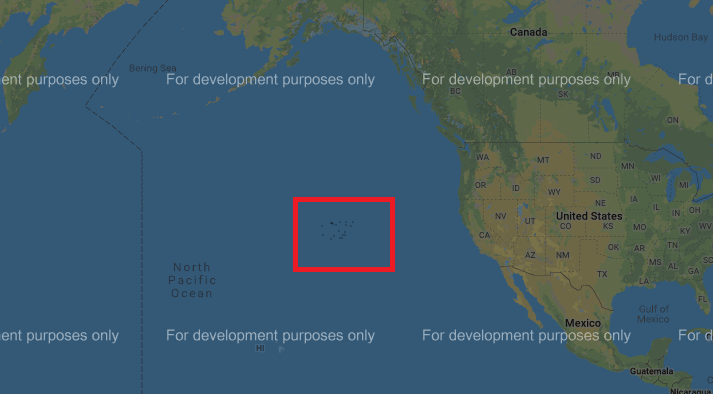

Similarly refer for Destination Latitude and Longitude

In [19]:
df5 = df1
latitude_list = list(df5["Destination Latitude"])
longitude_list = list(df5["Destination Longitude"])
l1 = math.floor(len(latitude_list)/2)
l2 = math.floor(len(longitude_list)/2)
mi = latitude_list[l1]
ma = longitude_list[l2]

gmap3 = gmplot.GoogleMapPlotter(mi,ma, 2) 
  
# scatter method of map object  
# scatter points on the google map 
gmap3.scatter( latitude_list, longitude_list, '#000000', 
                              size = 100, marker = False ) 
# Plot method Draw a line in 
# between given coordinates 
#gmap3.plot(latitude_list, longitude_list,  
 #          'cornflowerblue', edge_width = 2.5) 

gmap3.draw( "mymap_destination.html" ) 

f = "mymap_destination.html"
webbrowser.open_new_tab(f)

True

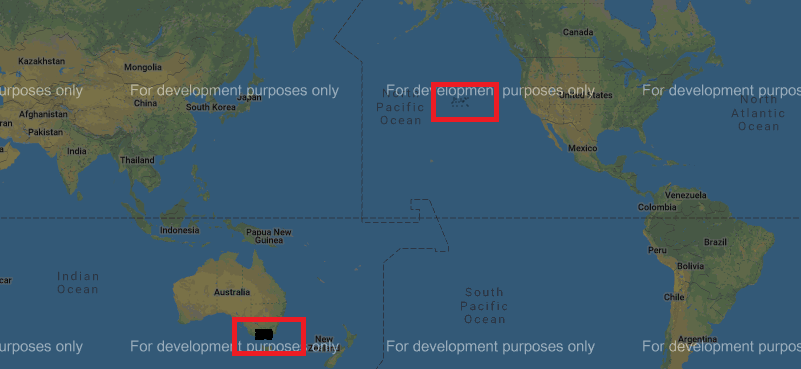

Above highlighted points are the Destination points, some of which are in Blue.

In [20]:
df5= df1[(df1["Destination Latitude"]>0) & (df1["Destination Longitude"]<0)]

latitude_list = list(df5["Destination Latitude"])
longitude_list = list(df5["Destination Longitude"])
l1 = math.floor(len(latitude_list)/2)
l2 = math.floor(len(longitude_list)/2)
mi = latitude_list[l1]
ma = longitude_list[l2]

gmap3 = gmplot.GoogleMapPlotter(mi,ma, 3) 
  
# scatter method of map object  
# scatter points on the google map 
gmap3.scatter( latitude_list, longitude_list, '#000000', 
                              size = 100, marker = False ) 
# Plot method Draw a line in 
# between given coordinates 
#gmap3.plot(latitude_list, longitude_list,  
 #          'cornflowerblue', edge_width = 2.5) 

gmap3.draw( "mymap_destination1.html" ) 

f = "mymap_destination1.html"
webbrowser.open_new_tab(f)

True

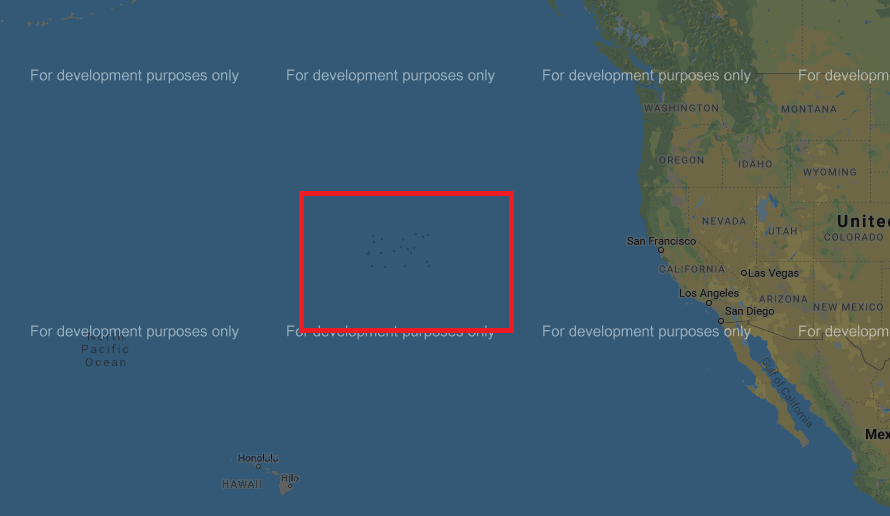

Above are the only points outside Victoria region

Please note that if the above codes do not work, gmplot is needed to be installed.

In [21]:
#!pip uninstall gmplot

In [22]:
#!pip install --upgrade matplotlib

Because we know that the Longitude and Latitude of Victoria lie in South-East i.e. Longitude = positive and Latitude = Negative
Thus we correct these Origin and Destination Latitude and Longitude values using this logic.

In [23]:
count1 =0
count2 =0
count3 =0
count4 =0
for each in df1.index:
    if df1.iloc[each]["Origin Latitude"]>0:
        df1.at[each, "Origin Latitude"] = df1.iloc[each]["Origin Latitude"]*(-1)
        count1+=1
    if df1.iloc[each]["Origin Longitude"]<0:
        df1.at[each, "Origin Longitude"] = df1.iloc[each]["Origin Longitude"]*(-1)
        count2+=1
    if df1.iloc[each]["Destination Latitude"]>0:
        df1.at[each, "Destination Latitude"] = df1.iloc[each]["Destination Latitude"]*(-1)
        count3+=1
    if df1.iloc[each]["Destination Longitude"]<0:
        df1.at[each, "Destination Longitude"] = df1.iloc[each]["Destination Longitude"]*(-1)
        count4+=1
    
print(count1, count2, count3, count4)

20 20 20 20


The Origin Latitude Longitude and Destination Latitude Longitude are getting fixed for 20 records each.
Now we again check the statistics of Origin Longitude and Latitude and Destination Longitude and Latitude

In [24]:
df1["Origin Longitude"].describe()

count    38348.000000
mean       145.528928
std          1.643328
min        142.770097
25%        144.128731
50%        145.441143
75%        146.955792
max        148.449748
Name: Origin Longitude, dtype: float64

In [25]:
df1["Destination Longitude"].describe()

count    38348.000000
mean       145.538620
std          1.644533
min        142.770097
25%        144.134194
50%        145.463443
75%        146.970152
max        148.449748
Name: Destination Longitude, dtype: float64

In above both records, the Longitudes are fixed and now no value is negative.

In [26]:
df1["Origin Latitude"].describe()

count    38348.000000
mean       -37.825283
std          0.756889
min        -39.006967
25%        -38.487490
50%        -37.848781
75%        -37.175162
max        -36.508018
Name: Origin Latitude, dtype: float64

In [27]:
df1["Destination Latitude"].describe()

count    38348.000000
mean       -37.828404
std          0.754639
min        -39.006967
25%        -38.488042
50%        -37.854393
75%        -37.177983
max        -36.508018
Name: Destination Latitude, dtype: float64

Similarily no Latitude is now positive.

### 4.3 Journey Distance

Now because the Origin and Destination Latitudes and Longitudes are fixed, we can compute the Distance between the two using the earth radius R = 6378 km.
But we before we do that, we first look at the values

In [28]:
df1["Journey Distance"].describe()

count    38348.000000
mean       210.602428
std        108.419333
min          0.203000
25%        127.165750
50%        200.823000
75%        281.828250
max        536.635000
Name: Journey Distance, dtype: float64

Above are the current statistics of Journey Distance, there are no missing values.

Fixing Journey Distance where it is wrong

In [29]:
R = 6378.0
count = 0
for each in df1.index:
    lat1 = radians(df1.iloc[each]['Origin Latitude'])
    lon1 = radians(df1.iloc[each]['Origin Longitude'])
    lat2 = radians(df1.iloc[each]['Destination Latitude'])
    lon2 = radians(df1.iloc[each]['Destination Longitude'])

    dlon = lon2 - lon1  # calculating difference between the corrdinate points
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    if round(distance,3) != round(df1.iloc[each]['Journey Distance'],3): #verifying the calculated distance with given
        df1.at[each, 'Journey Distance'] = round(distance,3)
        count+=1
print(count)

15


Journey Distance is fixed for 15 records.<br>
Now lets view the stats again

In [30]:
df1["Journey Distance"].describe()

count    38348.000000
mean       210.601737
std        108.419178
min          0.203000
25%        127.165750
50%        200.823000
75%        281.828250
max        536.635000
Name: Journey Distance, dtype: float64

The stats remain almost same.

Below is the scatter plot of fixed Journey Distance with current Travel Time

Drone Type
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
3.0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

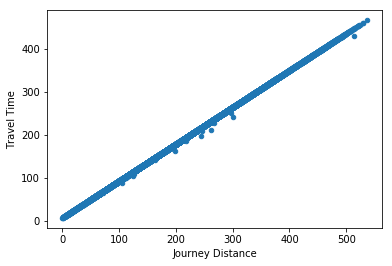

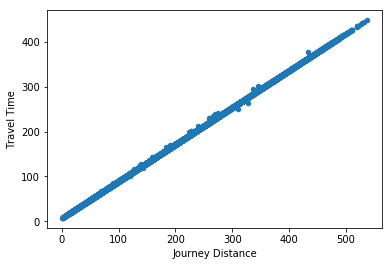

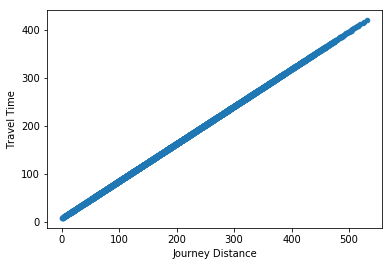

In [31]:
df1.groupby(["Drone Type"]).plot('Journey Distance', 'Travel Time', kind = 'scatter')

As seen observed, there is a linear relationship which is expected. Also there are some outliers in the data , which might get fixed when Travel Time will be fixed.

### 4.4 Departure Date

Now checking if there are any issues with the Departure Date

In [32]:
count = 0
count1 =0 
for each in df1.index:
    s = df1.iloc[each]["Departure Date"]
    try:
        s = datetime.strptime(s,'%Y-%m-%d')
    except ValueError:
        try:
            s = datetime.strptime(s,'%Y-%d-%m')
            count1+=1
        except ValueError:
            count+=1
print(count, count1)

100 121


As seen above, there are total 100 incorrect Departure Date. Also for 121 records, the Departure Date is not in consistent format i.e. %Y-%m-%d. So we need to correct the incoorect Date and bring everything to a consistent format.

In [33]:
df1["Departure Date"].isnull().sum()

0

There are no missing values.

In [34]:
count1 =0 
count =0
for each in df1.index:
    s = df1.iloc[each]["Departure Date"]
    try:
        s = datetime.strptime(s,'%Y-%m-%d')
    except ValueError:
        try:
            s = datetime.strptime(s,'%Y-%d-%m') 
            s = str(datetime.strftime(s,'%Y-%m-%d'))
            df1.at[each, "Departure Date"] = s  #assigning the central value 
            count1+=1
        except ValueError:
            s_y = s[0:4]
            s_m = s[5:7]
            s_d = s[8:10]
            day, num_days = calendar.monthrange(int(s_y), int(s_m)) #updating the date to last day of the month if it is invalid
            s = datetime(int(s_y), int(s_m), num_days)
            s = str(datetime.strftime(s,'%Y-%m-%d'))
            df1.at[each, "Departure Date"] = str(s)
            count+=1
print(count, count1)            

   

100 121


Thus above all the records are corrected and brought to same format, this is verified below

In [35]:
count=0
for each in df.index:
    s = df1.iloc[each]["Departure Date"]
    try:
        datetime.strptime(s,'%Y-%m-%d')
    except ValueError:
        count+=1
print(count)

0


Because we got 0 count, means everything is in sync now.

### 4.5 Origin Region and Destination Region

Now we check the data for Origin Region and Destination Region.<br>
First we check the plot of Origin Longitude and Latitudes on map

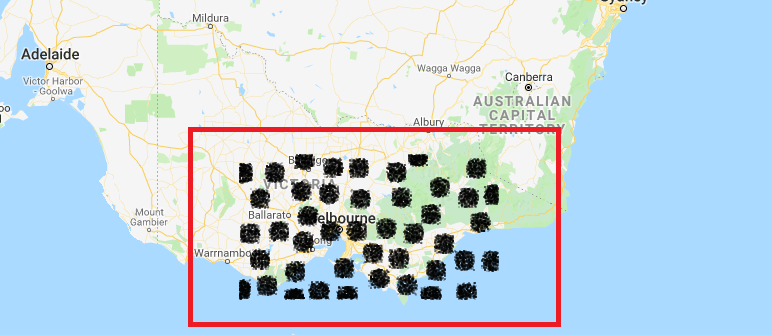

All the above clusters represent each Origin Region.<br>
Below are it stats, there are 10 missing values.

In [36]:
df1["Origin Region"].describe()

count    38338.000000
mean        22.328708
std         12.664915
min          1.000000
25%         11.000000
50%         22.000000
75%         33.000000
max         44.000000
Name: Origin Region, dtype: float64

Similarily the below clusters represent Destination Region

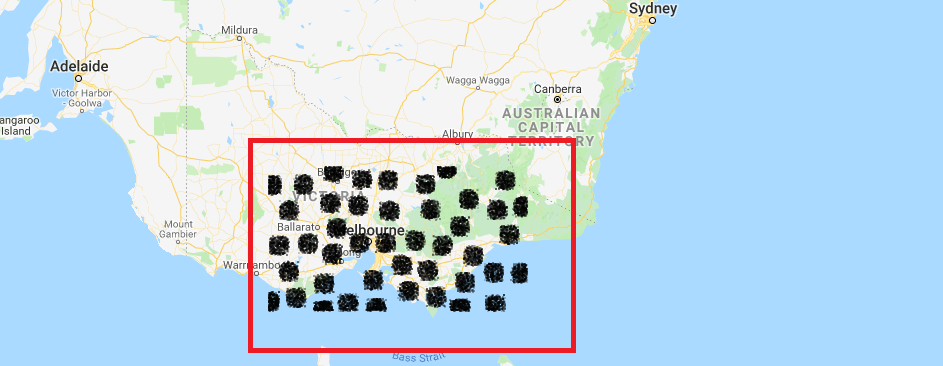

In [37]:
df1["Destination Region"].describe()

count    38338.000000
mean        22.409907
std         12.725390
min          1.000000
25%         11.000000
50%         22.000000
75%         33.000000
max         44.000000
Name: Destination Region, dtype: float64

Above are Destination Region stats, there are 10 missing values.

We find the K nearest neighbours for each Origin Region and fix them

In [38]:
temp = df1[df1['Origin Region'].isna() == False]
X = temp[["Origin Latitude", "Origin Longitude"]]#.reshape(-1, 1)
y = temp["Origin Region"].reshape(-1, 1)

neigh = KNeighborsClassifier()
neigh.fit(X, y)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
df1["Origin_predict"] = neigh.predict(df1[["Origin Latitude", "Origin Longitude"]])
count=0
for i in df1.index:
        if df1.iloc[i]["Origin Region"] != df1.iloc[i]["Origin_predict"]:
            df1.at[i,"Origin Region"] = df1.iloc[i]["Origin_predict"]
            count+=1
print(count)

30


Above code will fix all the Origin Region and also fix the nan values.<br>
As seen, there are 30 records for Origin Region getting fixed.

Similarily for Destination Region

In [40]:
temp = df1[df1['Destination Region'].isna() == False]
X = temp[["Destination Latitude", "Destination Longitude"]]#.reshape(-1, 1)
y = temp["Destination Region"].reshape(-1, 1)

neigh = KNeighborsClassifier()
neigh.fit(X, y)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [41]:
df1["Destination_predict"] = neigh.predict(df1[["Destination Latitude", "Destination Longitude"]])
count=0
for i in df1.index:
        if df1.iloc[i]["Destination Region"] != df1.iloc[i]["Destination_predict"]:
            df1.at[i,"Destination Region"] = df1.iloc[i]["Destination_predict"]
            count+=1
print(count)

30


Above code will fix all the Destination Region and also fix the nan values.
As seen, there are 30 records for Destination Region getting fixed.

In [42]:
df1["Origin Region"].isnull().sum()

0

In [43]:
df1["Destination Region"].isnull().sum()

0

There are no Null values now in Origin and Destination Region.

### 4.6 Drone Type

Now we fix the Drone Type. Because the Drone Type is classified by the Speed of the Drone, so we use the same to fix it.<br>
First we check the stats of Drone Type.

In [44]:
df1["Drone Type"].isnull().sum()

10

In [45]:
df1["Drone Type"].unique()

array([ 3.,  2.,  1., nan])

There are 10 null values in Drone Type. Also the unique values except nan are 1,2,3

Now we find the On-route speed of the Drone and the (Takeoff+Landing Speed) of the Drone.<br>
For this we have considered the Travel Time where it is correct w.r.t. Delivery and Departure Time.<br>
Then sampling of the data is done and the speeds are calculated as below.

In [46]:
for each in df1.index:
    time = datetime.strptime(df1.iloc[each]["Delivery Time"], '%H:%M:%S')\
            - datetime.strptime(df1.iloc[each]["Departure Time"], '%H:%M:%S')
    if time.days < 0:
        time = timedelta(days=0,
                seconds=time.seconds, microseconds=time.microseconds)
    else:
        time = timedelta(days=time.days,
            seconds=time.seconds, microseconds=time.microseconds)
    time = time.seconds/60 + (time.days*24*60)

    df1.at[each, 'time_diff'] = round(time,2)
        
x=[]
for i in df1.index:
    if abs(df1.iloc[i]['time_diff']-round(df1.iloc[i]['Travel Time'],2)) < 0.02:  # Time difference with a threshold of 0.02 taken for sampling
        x.append('0')
    else:
        x.append('1')

df1['new']=x
drone = [1,2,3]
y=df1[df1['new']=='0']
T1 = [0.0,0.0,0.0] # Time list for sample1
T2 = [0.0,0.0,0.0] # Time list for sample2
D1 = [0.0,0.0,0.0] # Distance list for sample1
D2 = [0.0,0.0,0.0] # Distance list for sample2
B = [0.0,0.0,0.0] # Beta list for drone
#D = [0.0,0.0,0.0] # Beta list for drone
S= [0.0,0.0,0.0] # Speed list for drone

for each in drone:
    sample1=y[y["Drone Type"]==each].sample()  # sample for each Drone type
    sample2=y[y["Drone Type"]==each].sample(2)
    
    T1[each-1]=sample1['Travel Time'].mean() #mean for Travel time
    T2[each-1]=sample2['Travel Time'].mean()
    D1[each-1]=sample1['Journey Distance'].mean() #mean for Distance
    D2[each-1]=sample2['Journey Distance'].mean()

    S[each-1]=(D1[each-1]-D2[each-1])*60/((T1[each-1]-10)-(T2[each-1]-10)) # Speed calculated
    B[each-1]=(D1[each-1]-S[each-1]*((T1[each-1]-10)/60)) #Beta calculated
    
print("The Takeoff+Landing Speed are:", "\nDrone1:", B[0],  "\nDrone2:", B[1],  "\nDrone3:" , B[2])
print("The Onroute  Speed are:", "\nDrone1:", S[0],  "\nDrone2:", S[1],  "\nDrone3:", S[2])

The Takeoff+Landing Speed are: 
Drone1: 3.5005799071047363 
Drone2: 3.5704385787827846 
Drone3: 3.6051378421261404
The Onroute  Speed are: 
Drone1: 69.99862377429899 
Drone2: 73.00353285555666 
Drone3: 77.02300674335581


As seen above, the Speed are shown above for each Drone Type

Also we calculate the Travel Time as per these Speeds and check the Error with given Travel Time for each Drone Type as below

In [47]:
df1["error1"] = 0.0
df1["error2"] = 0.0
df1["error3"] = 0.0

B = [3.50, 3.57, 3.65]
S = [70, 73, 77]


for i in df1.index:
    df1.at[i,'tt1'] = 10/60+ ((df1.loc[i]['Journey Distance']-B[0])/S[0])
    df1.at[i,'tt2'] = 10/60+ ((df1.loc[i]['Journey Distance']-B[1])/S[1])
    df1.at[i,'tt3'] = 10/60+ ((df1.loc[i]['Journey Distance']-B[2])/S[2])
    
    
df1["error1"] = df1.apply(lambda x:abs(df1["tt1"] - df1["Travel Time"]/60)/(df1["tt1"])) #Error for each calculated travel time
df1["error2"] = df1.apply(lambda x: abs(df1["tt2"] - df1["Travel Time"]/60)/(df1["tt2"])) #Error for each calculated travel time
df1["error3"] = df1.apply(lambda x: abs(df1["tt2"] - df1["Travel Time"]/60)/(df1["tt3"])) #Error for each calculated travel time
    
#for each in drone:
for i in df1[df1["Drone Type"]==1].index:
    if df1.iloc[i]["error1"] > 0.01:  # Updated Drone type for each type when the threshold error is not acheived
        if (df1.iloc[i]["error2"] < 0.01)& (df1.iloc[i]["error3"] > 0.01):
            df1.at[i,"Drone Type"]=2
        elif (df1.iloc[i]["error2"] > 0.01)& (df1.iloc[i]["error3"] < 0.01):
            df1.at[i, "Drone Type"]=3
            
for i in df1[df1["Drone Type"]==2].index:
    if df1.iloc[i]["error2"] > 0.01:
        if (df1.iloc[i]["error1"] < 0.01)& (df1.iloc[i]["error3"] > 0.01):
            df1.at[i,"Drone Type"]=1
        elif (df1.iloc[i]["error1"] > 0.01)& (df1.iloc[i]["error3"] < 0.01):
            df1.at[i, "Drone Type"]=3            

for i in df1[df1["Drone Type"]==3].index:
    if df1.iloc[i]["error3"] > 0.01:
        if (df1.iloc[i]["error1"] < 0.01)& (df1.iloc[i]["error2"] > 0.01):
            df1.at[i,"Drone Type"]=1
        elif (df1.iloc[i]["error1"] > 0.01)& (df1.iloc[i]["error2"] < 0.01):
            df1.at[i, "Drone Type"]=2 

# Imputing missing values with minimum error
for i in df1[df1["Drone Type"].isna()==True].index:
    if df1.iloc[i]["error2"] < df1.iloc[i]["error1"] and df1.iloc[i]["error3"]>df1.iloc[i]["error2"] :
        df1.at[i,"Drone Type"]=2
    elif df1.iloc[i]["error3"]< df1.iloc[i]["error1"] and df1.iloc[i]["error3"]<df1.iloc[i]["error2"] :
        df1.at[i, "Drone Type"]=3
    else:
        df1.at[i, "Drone Type"]=1
        

The error precision taken is 0.01 and hence the Drone Type is assigned accordingly.

In [48]:
df1[df1["Drone Type"].isna()==True]

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,...,Origin_predict,Destination_predict,time_diff,new,error1,error2,error3,tt1,tt2,tt3


In [49]:
df1["Drone Type"].unique()

array([3., 2., 1.])

In [50]:
count = 0
for i in df1.index:
    if df1.iloc[i]["Drone Type"]!= df.iloc[i]["Drone Type"]:
        count+=1
        
print(count)

36


After comparing from the original dataset, 35 records including nan values of Drone Type are getting fixed.

### 4.7 Travel Time

Now we fix the Travel Time with reference to Drone Type fix.<br>
First we look at the stats

In [51]:
df1["Travel Time"].describe()

count    38308.000000
mean       182.100459
std         90.434770
min          7.170000
25%        112.317500
50%        173.240000
75%        241.542500
max        466.310000
Name: Travel Time, dtype: float64

There are 40 missing values to be imputed for Travel Time and the mean is 182.100.<br>
Also the mean must not vary much as there is a linear relationship between Journey Distance and Travel Time

In [52]:
for each in drone:
   # print(each)
    for i in df1[df1["Drone Type"] == each].index:
        df1.at[i,"tt"] = round((10+ ((df1.iloc[i]['Journey Distance']-B[each-1])/S[each-1])*60), 2)
count = 0
for i in df1.index:
    if (abs(round(df1.iloc[i]["Travel Time"],2)-df1.iloc[i]["tt"]) > 0.5) or pd.isnull(df1.iloc[i]["Travel Time"]):
        count+=1
        df1.at[i,"Travel Time"] = df1.iloc[i]["tt"] 
        
print(count)

65


In [53]:
df1["Travel Time"].isnull().sum()

0

So total of values of Travel Time are fixed including Null.

Now again verifying the Linear relationship between Journey Distance and Travel Time

Drone Type
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
2.0    AxesSubplot(0.125,0.125;0.775x0.755)
3.0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

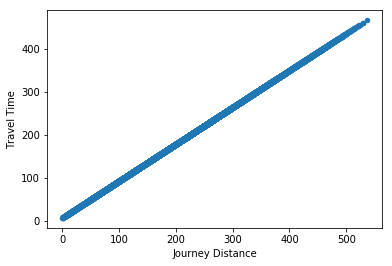

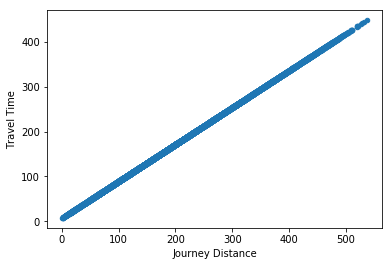

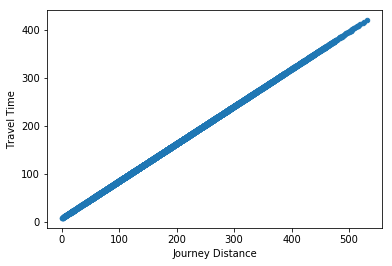

In [54]:
df1.groupby(["Drone Type"]).plot('Journey Distance', 'Travel Time', kind = 'scatter')

As observed above, now there are no outliers anywhere and the graph is perfectly linear.

### 4.8 Delivery Time

Verifying the Delivery Time, there are no missing value, We hav only verified the value with updated Travel Time and Departure Time, and wherever it is incorrect it is updated

In [55]:
count = 0
for each in df1.index:
    time = datetime.strptime(df1.iloc[each]["Delivery Time"], '%H:%M:%S')\
            - datetime.strptime(df1.iloc[each]["Departure Time"], '%H:%M:%S')
    if time.days < 0:
        time = timedelta(days=0,
                seconds=time.seconds, microseconds=time.microseconds)
    else:
        time = timedelta(days=time.days,
                seconds=time.seconds, microseconds=time.microseconds)
    time = round(time.seconds/60 + (time.days*24*60),2)
    time2 = df1.iloc[each]['Travel Time']
    if time-time2>0.1:  # verified that the Delivery Time is equal to Travel Time + Departure Time or not, else updated
        x = datetime.strptime(df1.iloc[each]["Departure Time"], '%H:%M:%S') + timedelta(minutes=time2)
        x = datetime.strftime(x, '%H:%M:%S')
        df1.at[each, "Delivery Time"] = x
        count+=1
    
print(count)


55


Before fixing any further data, we remove useless columns from the dataframe

In [56]:
df1.columns

Index(['Id', 'Drone Type', 'Post Type', 'Package Weight', 'Origin Region',
       'Destination Region', 'Origin Latitude', 'Origin Longitude',
       'Destination Latitude', 'Destination Longitude', 'Journey Distance',
       'Departure Date', 'Departure Time', 'Travel Time', 'Delivery Time',
       'Delivery Fare', 'Interval', 'Origin_predict', 'Destination_predict',
       'time_diff', 'new', 'error1', 'error2', 'error3', 'tt1', 'tt2', 'tt3',
       'tt'],
      dtype='object')

In [57]:
df1 = df1.drop(['Origin_predict', 'Destination_predict',
       'time_diff', 'new', 'tt1', 'tt2', 'tt3', 'error1', 'error2', 'error3',
       'tt'], axis=1)

### 4.9 Delivery Fare

We will first calculate the outliers from Delivery Fare and remove those rows from the dataset. 

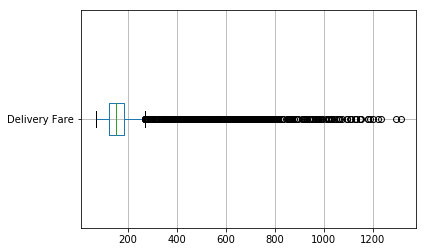

In [58]:
df1.boxplot("Delivery Fare", vert=False)
q1, q2, q3, q4 = df1["Delivery Fare"].quantile([0.25, 0.5, 0.75, 1])

iqr = q3-q1
upper_bound = q3 + iqr*1.5  

df1 = df1[(df1["Delivery Fare"] < upper_bound) | (df1["Delivery Fare"].isna() == True)]


Next checking the stats on Delivery Fare after removing outliers

In [59]:
df1["Delivery Fare"].describe()

count    37947.000000
mean       154.547127
std         38.530853
min         71.760000
25%        124.775000
50%        151.260000
75%        181.600000
max        269.500000
Name: Delivery Fare, dtype: float64

As seen now the record count has decreased as some outliers are removed.

Next we split our dataset into Train and Test Data

In [60]:
from sklearn.model_selection import train_test_split
df2 = df1[df1["Delivery Fare"].isna() == False][[ 'Drone Type', 'Post Type', 'Package Weight','Journey Distance',
       'Travel Time', 'Interval', 'Delivery Fare']] 
X=df2[[ 'Drone Type', 'Post Type', 'Package Weight','Journey Distance',
       'Travel Time', 'Interval']]  # Features
y=df2[['Delivery Fare']]  # Lab
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5) # 70% training and 30% test

Further, we use Linear Regression to fir the train data and verify the score of the fit

In [61]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
s = model.score(X_train,y_train)*100
print(s)

98.58017240068754


Score ~ 98%

In [62]:
y_pred = model.predict(X_test)

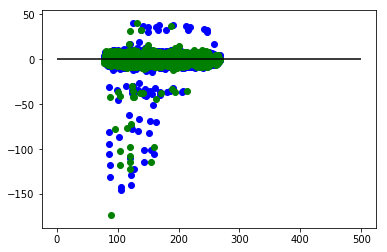

In [63]:
plt.scatter(model.predict(X_train), model.predict(X_train)-y_train, c='b')
plt.scatter(model.predict(X_test), model.predict(X_test)-y_test, c='g')
plt.hlines(y=0, xmin=0, xmax=500)



As visible above, most of the data is around the 0 line, hence it is a good fit and can be sued to predict Delivery Fare. Also the score of model is 0.98 which again implies good fit.<br>
So, we predict the fare using above model for the entire dataset and compare it with our data.<br>
Threshold value for comparison taken is 8 points

In [64]:
df_reg = df1[['Drone Type', 'Post Type', 'Package Weight','Journey Distance',
       'Travel Time', 'Interval']]

df_reg["fare_predict"] = model.predict(df_reg)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [65]:
count = 0
for i in df_reg.index:
    if round(df1.loc[i]["Delivery Fare"],2) != round(df_reg.loc[i]["fare_predict"],2) or pd.isnull(df1.loc[i]["Delivery Fare"]):
        count+=1
        df1.at[i,"Delivery Fare"]= df_reg.loc[i]["fare_predict"]
        #print(i)
        
print(count)

37931


Now we drop the Interval column

In [66]:
df1 = df1.drop(["Interval"], axis = 1)

Now we remove the duplicates in the dataset, there are 46 duplicates

In [67]:
len(df1[df1.duplicated(keep=False)])

76

In [68]:
df1.drop_duplicates(keep=False, inplace=True)

We finally verify all the columns and datatypes of the output

In [69]:
df1.describe()

,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Travel Time,Delivery Fare
count,37901.000000,37901.000000,37901.000000,37901.000000,37901.000000,37901.000000,37901.000000,37901.000000,37901.000000,37901.000000,37901.000000,37901.000000
mean,1.697396,0.299412,26.064586,22.323580,22.401520,-37.824775,145.527483,-37.828190,145.538994,210.342278,181.890067,154.524283
std,0.779934,0.458006,12.185076,12.664218,12.724787,0.756947,1.641915,0.754306,1.645209,108.351973,90.382918,38.250932
min,1.000000,0.000000,5.000000,1.000000,1.000000,-39.006967,142.770097,-39.006967,142.770097,0.203000,7.170000,77.527244
25%,1.000000,0.000000,15.443000,11.000000,11.000000,-38.486766,144.129861,-38.487917,144.134106,126.941000,112.070000,124.927731
50%,1.000000,0.000000,26.033000,22.000000,22.000000,-37.847925,145.439996,-37.852627,145.463443,200.632000,173.150000,151.068714
75%,2.000000,1.000000,36.611000,33.000000,33.000000,-37.174651,146.951772,-37.177939,146.971918,281.481000,241.310000,181.447510
max,3.000000,1.000000,56.607000,44.000000,44.000000,-36.508018,148.449748,-36.508018,148.449748,536.635000,466.310000,268.784437


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37901 entries, 0 to 38344
Data columns (total 16 columns):
Id                       37880 non-null object
Drone Type               37901 non-null float64
Post Type                37901 non-null float64
Package Weight           37901 non-null float64
Origin Region            37901 non-null float64
Destination Region       37901 non-null float64
Origin Latitude          37901 non-null float64
Origin Longitude         37901 non-null float64
Destination Latitude     37901 non-null float64
Destination Longitude    37901 non-null float64
Journey Distance         37901 non-null float64
Departure Date           37901 non-null object
Departure Time           37901 non-null object
Travel Time              37901 non-null float64
Delivery Time            37901 non-null object
Delivery Fare            37901 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.9+ MB


We write the final data in the output file.

In [71]:
df1.to_csv("29325013_solution.csv", index = False)

## 5. Summary

* Out of 38348 records, only are left in the final dataset after cleaning
* Duplicates are present in the dataset
* Departure Time is correct
* Drone Type are depenedent on the Speed of teh Drone
* Package weight is correct in the data
* Delivery Fare is fitting for almost entire data after fixing
* Origin and Destination Regions are classified using the clusters
* Origin and Destination Longitude and Latitude are fixed for the Victoria coordinates
* ID can not be imputed as it is randomly generated

## 6. References

1. https://stackoverflow.com/questions/16870663/how-do-i-validate-a-date-string-format-in-python
2. https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
3. http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/